In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('NLP.tsv',delimiter='\t',quoting=3)
print(df)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [2]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,1000):
    review=re.sub('[^a-zA-Z]',' ',df['Review'][i])
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    all_stopwords=stopwords.words('english')
    all_stopwords.remove('not')
    review=[ps.stem(word) for word in review if not word in set(all_stopwords)]
    review=' '.join(review)
    corpus.append(review)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91871\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
print(corpus[:6])

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho']


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
x=cv.fit_transform(corpus).toarray()
y=df.iloc[:,-1].values
len(x[0])

1500

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x) 

In [6]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.01,random_state=20)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=1)
classifier.fit(x_tr,y_tr)

KNeighborsClassifier(p=1)

In [8]:
y_pred=classifier.predict(x_te)

[[5 1]
 [0 4]]
0.9


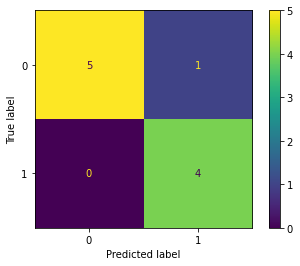

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
acc=accuracy_score(y_te,y_pred)
print(confusion_matrix(y_te,y_pred))
plot_confusion_matrix(X=x_te,y_true=y_te,estimator=classifier)
print(acc)